In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\GD077686\OneDrive - Cerner Corporation\Desktop\datatrained\New folder\winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#describing the data
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
df.info()   # looks like all feature are float data type
#There are a total of 1599 rows and 12 columns.  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
#checking for missing values
df.isnull().sum()   # no missing value 

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Data Exploration and Transformation
To see which variables are likely to affect the quality of red wine the most, I ran a correlation analysis of our independent variables against our dependent variable, quality.

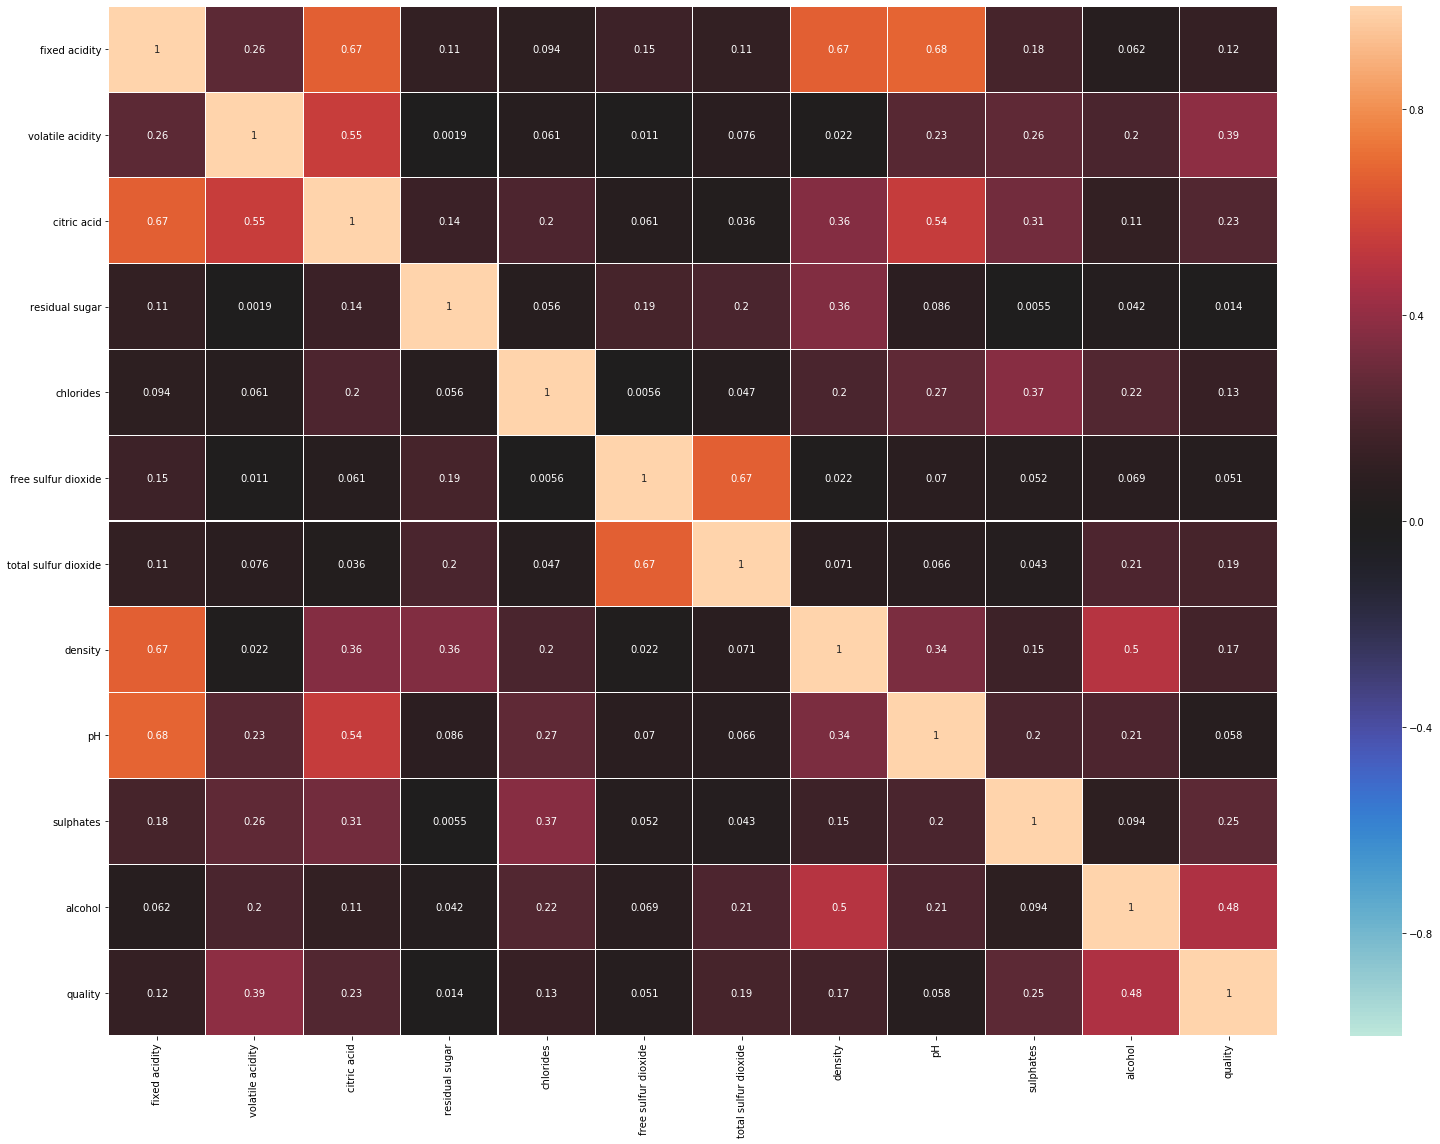

In [6]:
#checking the correlation with the help heatmap.
#first  row was  cut in half, so wrote the below code to fix that.
df_corr=df.corr().abs()

plt.figure(figsize=(22,16))
ax=sns.heatmap( df_corr,
    vmin=-1,
    vmax=1,
   
    center=0,
    
    annot=True,
    fmt='.2g',
    
    linewidths=.1,
    linecolor='white',square=None,)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.tight_layout()

In [7]:
#In order of highest correlation, these variables are:
''''

1. Alcohol: the amount of alcohol in wine
2. Volatile acidity: are high acetic acid in wine which leads to an unpleasant vinegar taste
3. Sulphates: a wine additive that contributes to SO2 levels and acts as an antimicrobial and antioxidant
4. Citric Acid: acts as a preservative to increase acidity (small quantities add freshness and flavor to wines)
5. Total Sulfur Dioxide: is the amount of free + bound forms of SO2
6. Density: sweeter wines have a higher density
7. Chlorides: the amount of salt in the wine
8. Fixed acidity: are non-volatile acids that do not evaporate readily
9. pH: the level of acidity
10. Free Sulfur Dioxide: it prevents microbial growth and the oxidation of wine
11. Residual sugar: is the amount of sugar remaining after fermentation stops.
--------------------


SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-7-c71ed4ff1cdd>, line 15)

In [ ]:
#Correlation b/w features V/S features
''''Fixed acidity is highly correlated to Citrix Acid  ---(67%)
     Fixed acidity is highly correlated to Density   ----(67%)
      Fixed acidity is highly correlated to pH   ----(68%)

In [7]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
# for this problem statement i am defining a bottle of wine as follows
#7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.


In [9]:
df['goodquality']=[1 if x >=7 else 0 for x in df['quality']]
df['goodquality'].unique()

array([0, 1], dtype=int64)

In [10]:
# now I sepatered my feature variable (X) and the target variable (y)in differnt data frame
X=df.drop(['goodquality','quality'],axis=1)
y=df['goodquality']

# checking the proportion of Dependent vriable(y)


In [11]:
df['goodquality'].value_counts()  #Looks like data is im-balance

0    1382
1     217
Name: goodquality, dtype: int64

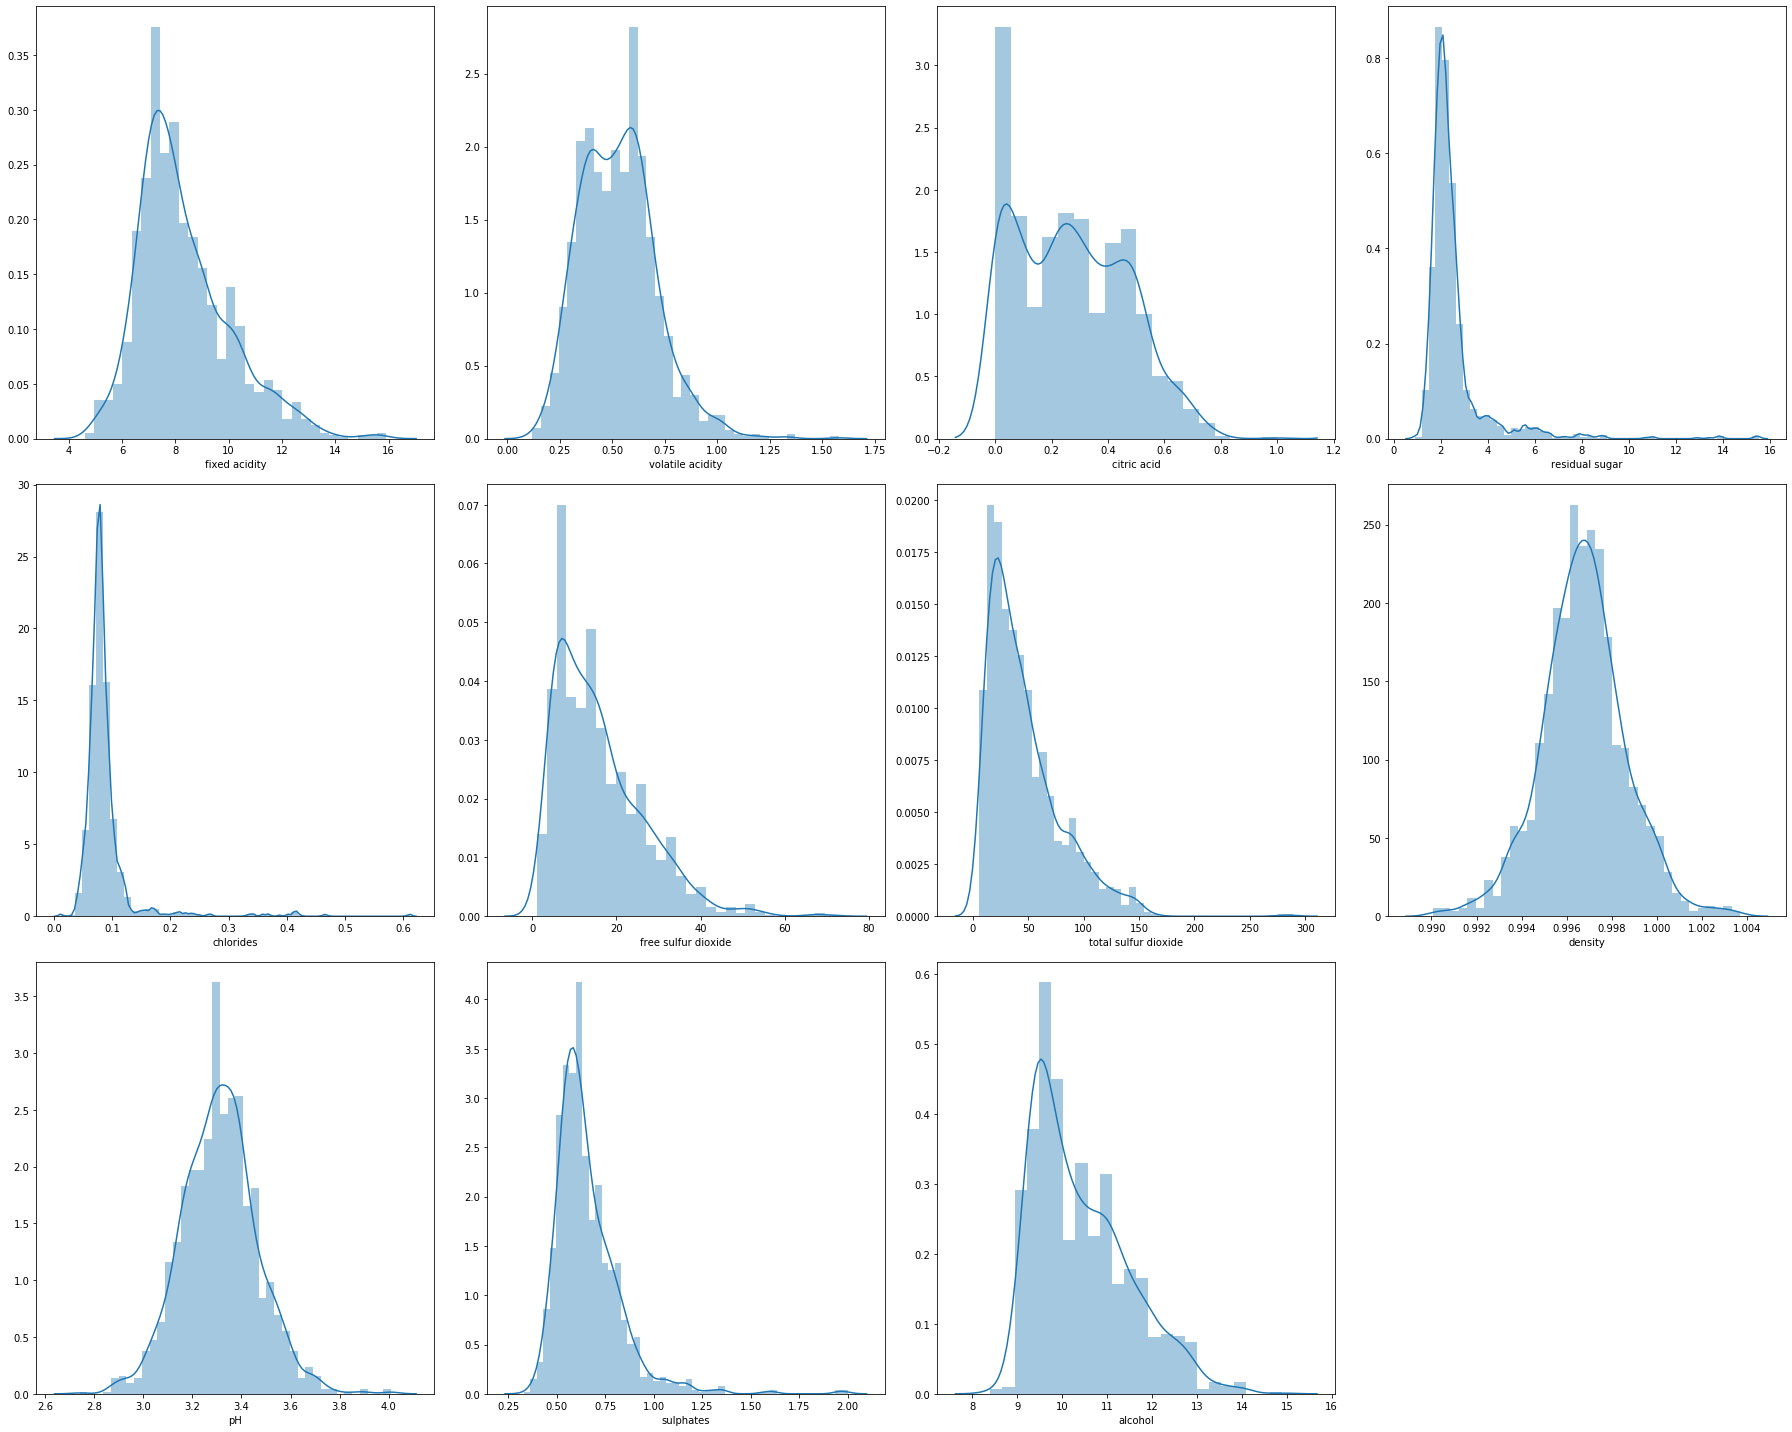

In [12]:
# checking the scatter plot
plt.figure(figsize=(25,20))
plot_number=1
for col in X:
    if plot_number <=12:
        ax=plt.subplot(3,4,plot_number)
        sns.distplot(X[col])
        plt.xlabel(col)
    plot_number+=1
plt.tight_layout()

In [13]:
X['citric acid'].unique()

array([0.  , 0.04, 0.56, 0.06, 0.02, 0.36, 0.08, 0.29, 0.18, 0.19, 0.28,
       0.51, 0.48, 0.31, 0.21, 0.11, 0.14, 0.16, 0.24, 0.07, 0.12, 0.25,
       0.09, 0.3 , 0.2 , 0.22, 0.15, 0.43, 0.52, 0.23, 0.37, 0.26, 0.57,
       0.4 , 0.49, 0.05, 0.54, 0.64, 0.7 , 0.47, 0.44, 0.17, 0.68, 0.53,
       0.1 , 0.01, 0.55, 1.  , 0.03, 0.42, 0.33, 0.32, 0.35, 0.6 , 0.74,
       0.58, 0.5 , 0.76, 0.46, 0.45, 0.38, 0.39, 0.66, 0.62, 0.67, 0.79,
       0.63, 0.61, 0.71, 0.65, 0.59, 0.34, 0.69, 0.73, 0.72, 0.41, 0.27,
       0.75, 0.13, 0.78])

In [ ]:
#In the below column distrubution is little skewed 
#USing log trnsformation to reduce the skewness.
#Features=[citric acid,residual sugar,volatile acidity,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol]

# Applying Log Transformation to continuous variable


In [18]:
''''X['citric acid']=np.log(X['citric acid'])
X['residual sugar'] =np.log(X['residual sugar'])
X['volatile acidity']= np.log(X['volatile acidity'])
X['chlorides'] = np.log(X['chlorides'])
X['free sulfur dioxide'] = np.log(X['free sulfur dioxide'])
X['total sulfur dioxide']=np.log(X['total sulfur dioxide'])
X['sulphates'] = np.log(X['sulphates'])
X['alcohol']  =np.log(X['alcohol'])

In [ ]:
''''#Let see how data is dittributed after log trandfomration.
plot_number=1
for col in X:
    if plot_number <=12:
        ax=plt.subplot(3,4,plot_number)
        sns.distplot(X[col])
        plt.xlabel(col)
    plot_number+=1
plt.tight_layout()

In [14]:
#Let's Standardised the data 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [17]:
#splitting the data set in test and train 
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=.25,random_state=0,stratify=y)

# I will compare five different machine learning models: decision trees, 
#random forests, AdaBoost, Gradient Boost, and XGBoost. For the purpose of this project, 
#I wanted to compare these models by their accuracy.

In [18]:
model1=DecisionTreeClassifier(random_state=1)
model1.fit(X_train,y_train)
y_pred1=model1.predict(X_test)

print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       346
           1       0.59      0.63      0.61        54

    accuracy                           0.89       400
   macro avg       0.76      0.78      0.77       400
weighted avg       0.89      0.89      0.89       400



# Model 2: Random Forest
Random forests are an ensemble learning technique that builds off of decision trees. Random forests involve creating multiple decision trees using bootstrapped datasets of the original data and randomly selecting a subset of variables at each step of the decision tree. The model then selects the mode of all of the predictions of each decision tree. What’s the point of this? By relying on a “majority wins” model, it reduces the risk of error from an individual tree.

In [19]:
from sklearn.ensemble import RandomForestClassifier
model2= RandomForestClassifier(random_state=1)
model2.fit(X_train,y_train)
y_pred2=model2.predict(X_test)

print(classification_report(y_test,y_pred2))   #As we can see the accuracy has increased  by 2 %.

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       346
           1       0.70      0.59      0.64        54

    accuracy                           0.91       400
   macro avg       0.82      0.78      0.79       400
weighted avg       0.91      0.91      0.91       400



# Model 3: AdaBoost
The next three models are boosting algorithms that take weak learners and turn them into strong ones.

In [25]:
from sklearn.ensemble import AdaBoostClassifier
model3=AdaBoostClassifier(random_state=1)
model3.fit(X_train,y_train)
y_pred3=model3.predict(X_test)

print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       346
           1       0.47      0.46      0.47        54

    accuracy                           0.86       400
   macro avg       0.69      0.69      0.69       400
weighted avg       0.86      0.86      0.86       400



# Model 4: Gradient Boosting

In [27]:
from sklearn.ensemble import GradientBoostingClassifier
model4=GradientBoostingClassifier(random_state=1)
model4.fit(X_train,y_train)
y_pred4=model4.predict(X_test)

print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       346
           1       0.60      0.48      0.54        54

    accuracy                           0.89       400
   macro avg       0.76      0.72      0.74       400
weighted avg       0.88      0.89      0.88       400



# Model 5: XGBoost

In [32]:
import xgboost as xgb
model5=xgb.XGBClassifier(random_state=1)
model5.fit(X_train,y_train)
y_pred5= model5.predict(X_test)

print(classification_report(y_test,y_pred5))  

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       346
           1       0.59      0.48      0.53        54

    accuracy                           0.89       400
   macro avg       0.76      0.71      0.73       400
weighted avg       0.88      0.89      0.88       400



# By comparing the five models, the random forest and Decision Tree seems to yield the highest level of accuracy. However, since Random Forest has a better f1-score for predicting good quality wines (1), I’m concluding that the RandomForest is the winner of the five models.

In [35]:
#Let find the ROC AUC score
from sklearn.metrics import roc_auc_score,roc_curve


In [42]:
# Decision tree
roc_auc_score(y_test,y_pred1)


0.7801327338899595

In [37]:
# Random forests
roc_auc_score(y_test,y_pred2)

0.776065082423464

In [38]:
#AdaBoost
roc_auc_score(y_test,y_pred3)

0.6910190537358168

In [40]:
#Gradient Boosting
roc_auc_score(y_test,y_pred4)

0.7161742667523014

In [41]:
## Model 5: XGBoost
roc_auc_score(y_test,y_pred5)

0.7147291800470991

# By checking the ROC_AUC score Decision Tree is the best model.